# Simple tests for QSO templates

A simple notebook that plays around with the templates.QSO Class.

In [1]:
import numpy as np
import warnings

import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

from desisim.templates import QSO

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
seed = 123
nmodel = 10

In [3]:
qso = QSO(minwave=3000, maxwave=5e4)

### Make templates with and without the fast Lyman-alpha forest.

In [4]:
flux, wave, meta = qso.make_templates(nmodel=nmodel, zrange=(2.0, 4.0), seed=seed, 
                                      nocolorcuts=True, lyaforest=False)

In [5]:
flux_forest, _, meta_forest = qso.make_templates(nmodel=nmodel, zrange=(2.0, 4.0), seed=seed, 
                                                 nocolorcuts=True, lyaforest=True)

In [6]:
meta

OBJTYPE,SUBTYPE,TEMPLATEID,SEED,REDSHIFT,MAG,DECAM_FLUX [6],WISE_FLUX [2],OIIFLUX,HBETAFLUX,EWOII,EWHBETA,D4000,VDISP,OIIDOUBLET,OIIIHBETA,OIIHBETA,NIIHBETA,SIIHBETA,ZMETAL,AGE,TEFF,LOGG,FEH
,,,,,,,,erg / (cm2 s),erg / (cm2 s),Angstrom,Angstrom,,km / s,,dex,dex,dex,dex,,Gyr,K,m / s2,
str10,str10,int64,int64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
QSO,,0,2991312382,2.84621292025,21.845,1.13045 .. 1.93474,3.5364 .. 25.9223,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,,1,3062119789,3.96152839677,20.4562,0.0979406 .. 8.01999,32.9949 .. 54.5157,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,,2,1228959102,3.36965947717,20.4386,2.50919 .. 6.38044,5.58704 .. 33.0771,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,,3,1840268610,2.96186380297,21.3289,1.82292 .. 3.17554,3.74577 .. 40.9519,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,,4,974319580,2.78423503639,21.3296,1.84122 .. 2.86704,4.0844 .. 40.5941,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,,5,2967327842,2.6863560323,21.586,1.62835 .. 3.14194,7.27288 .. 37.9606,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,,6,2367878886,3.45809941477,22.1236,0.122572 .. 1.64596,7.81299 .. 15.1341,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,,7,3088727057,2.87714448936,21.8111,0.928251 .. 2.73436,14.4657 .. 32.5649,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [7]:
meta_forest

OBJTYPE,SUBTYPE,TEMPLATEID,SEED,REDSHIFT,MAG,DECAM_FLUX [6],WISE_FLUX [2],OIIFLUX,HBETAFLUX,EWOII,EWHBETA,D4000,VDISP,OIIDOUBLET,OIIIHBETA,OIIHBETA,NIIHBETA,SIIHBETA,ZMETAL,AGE,TEFF,LOGG,FEH
,,,,,,,,erg / (cm2 s),erg / (cm2 s),Angstrom,Angstrom,,km / s,,dex,dex,dex,dex,,Gyr,K,m / s2,
str10,str10,int64,int64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
QSO,LYA,0,2991312382,2.84621292025,21.845,1.02201 .. 1.93465,3.53665 .. 25.8862,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,LYA,1,3062119789,3.96152839677,20.4562,0.0970256 .. 8.70275,35.8276 .. 59.1432,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,LYA,2,1228959102,3.36965947717,20.4386,2.22059 .. 6.37821,5.58765 .. 32.5178,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,LYA,3,1840268610,2.96186380297,21.3289,1.62206 .. 3.17528,3.7461 .. 40.7308,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,LYA,4,974319580,2.78423503639,21.3296,1.68465 .. 2.8669,4.08463 .. 40.5309,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,LYA,5,2967327842,2.6863560323,21.586,1.4656 .. 3.14187,7.2734 .. 37.9339,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,LYA,6,2367878886,3.45809941477,22.1236,0.104318 .. 1.64566,7.81413 .. 14.92,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
QSO,LYA,7,3088727057,2.87714448936,21.8111,0.816304 .. 2.73433,14.4665 .. 31.7727,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


### Show the forest

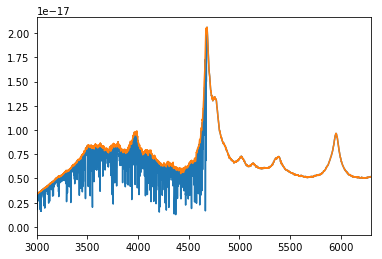

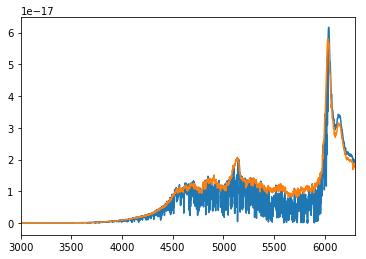

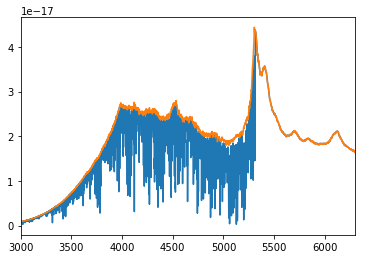

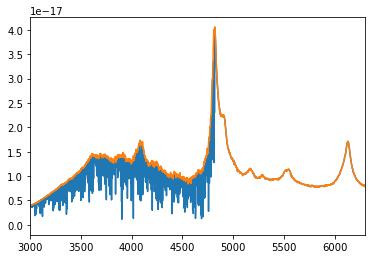

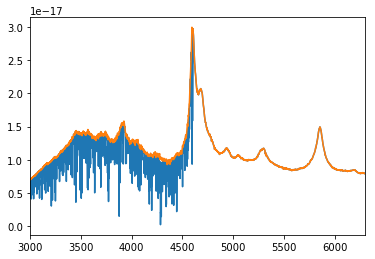

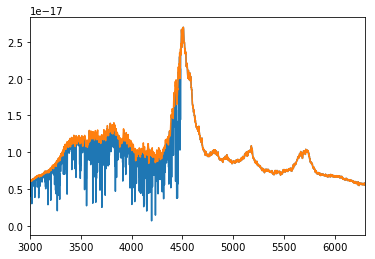

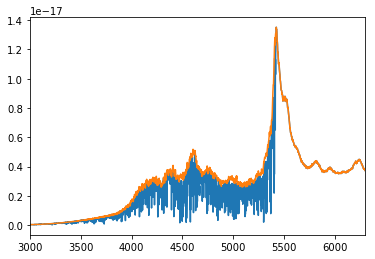

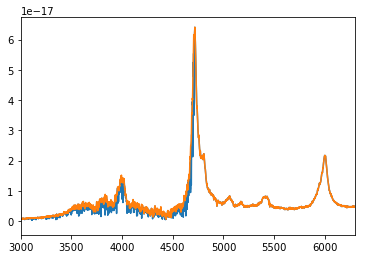

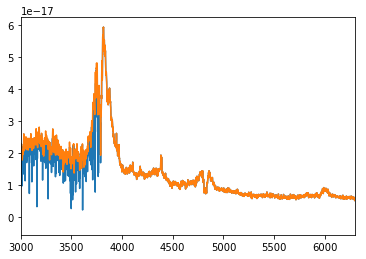

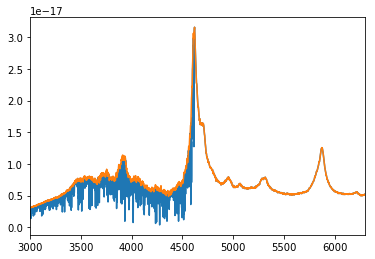

In [8]:
for ii in range(nmodel):
    plt.plot(wave, flux_forest[ii, :])
    plt.plot(wave, flux[ii, :])
    plt.xlim(3000, 6300)
    plt.show()

### Show the effect of extrapolation

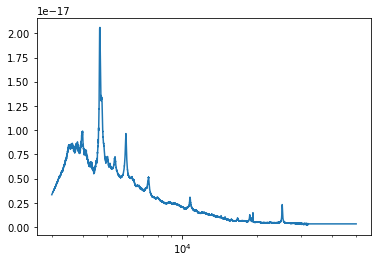

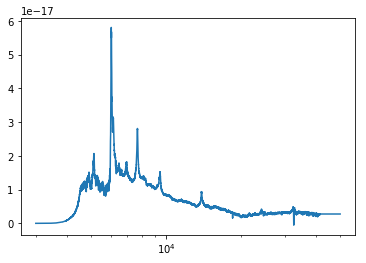

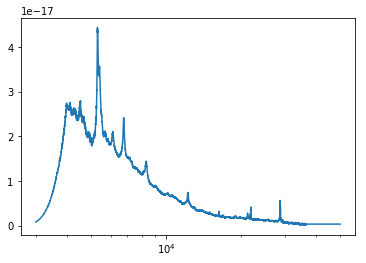

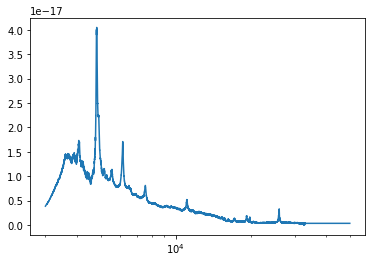

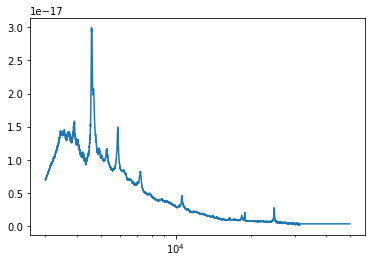

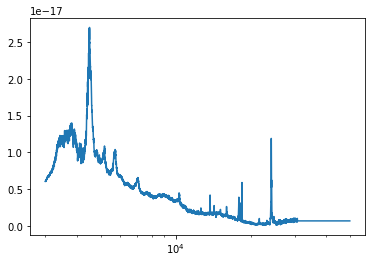

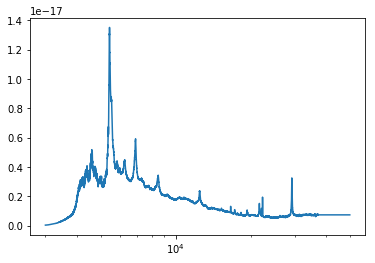

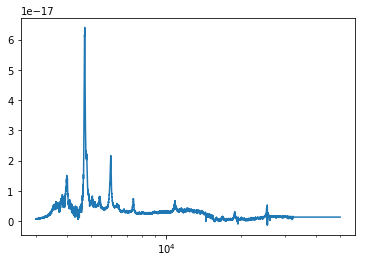

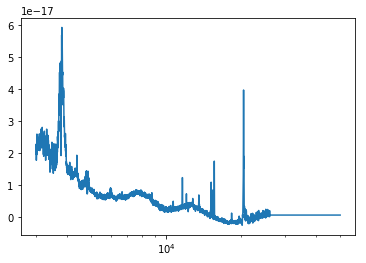

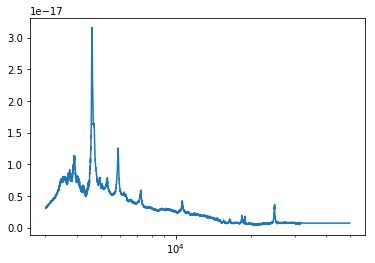

In [18]:
for ii in range(nmodel):
    plt.plot(wave, flux[ii, :])
    #plt.xlim(3000, 200)
    plt.xscale('log')
    plt.show()

### Look at the color-cuts.

In [10]:
flux1, _, meta1 = qso.make_templates(nmodel=100, seed=1, lyaforest=True, nocolorcuts=True)
flux2, _, meta2 = qso.make_templates(nmodel=100, seed=1, lyaforest=True, nocolorcuts=False)

In [11]:
fail = np.where(np.sum(flux2, axis=1) == 0)[0]
fail

array([], dtype=int64)

In [12]:
def qso_colorbox(ax, plottype='grz'):
    """Draw the QSO selection boxes."""
    rmaglim = 22.7
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    if plottype == 'grz-r':
        verts = [(xlim[0]-0.05, 17.0),
                 (22.7, 17.0),
                 (22.7, ylim[1]+0.05),
                 (xlim[0]-0.05, ylim[1]+0.05)
                ]
    if plottype == 'rW1-rz':
        verts = None
        ax.axvline(x=-0.3, ls='--', color='k')
        ax.axvline(x=1.3, ls='--', color='k')

    if plottype == 'gr-rz':
        verts = [(-0.3, 1.3),
                 (1.1, 1.3),
                 (1.1, ylim[0]-0.05),
                 (-0.3, ylim[0]-0.05)
                ]
    if verts:
        ax.add_patch(Polygon(verts, fill=False, ls='--', color='k'))

In [13]:
def flux2colors(cat):
    """Convert DECam/WISE fluxes to magnitudes and colors."""
    colors = dict()
    with warnings.catch_warnings(): # ignore missing fluxes (e.g., for QSOs)
        warnings.simplefilter('ignore')
        for ii, band in zip((1, 2, 4), ('g', 'r', 'z')):
            colors[band] = 22.5 - 2.5 * np.log10(cat['DECAM_FLUX'][..., ii].data)
        colors['grz'] = 22.5-2.5*np.log10((cat['DECAM_FLUX'][..., 1] + 
                                           0.8 * cat['DECAM_FLUX'][..., 2] +
                                           0.5 * cat['DECAM_FLUX'][..., 4]).data / 2.3)

        colors['gr'] = colors['g'] - colors['r']
        colors['rz'] = colors['r'] - colors['z']
    
    return colors

In [14]:
nocuts = flux2colors(meta1)
cuts = flux2colors(meta2)

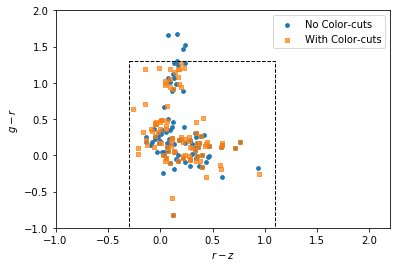

In [15]:
fig, ax = plt.subplots()
ax.scatter(nocuts['rz'], nocuts['gr'], s=14, label='No Color-cuts')
ax.scatter(cuts['rz'], cuts['gr'], s=14, marker='s', alpha=0.7, label='With Color-cuts')
ax.set_xlabel('$r - z$')
ax.set_ylabel('$g - r$')
ax.set_xlim(-1, 2.2)
ax.set_ylim(-1, 2.0)
ax.legend(loc='upper right')
qso_colorbox(ax, 'gr-rz')